# EXPERIMENT NO 5

## Data Preprocessing and Random Forest Regression Using GridSearchCV

###### 

### **1. Importing Libraries**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

### **2. Importing the dataset**

In [2]:
dataset = pd.read_csv(
    '/DOCUMENTS/COLLEGE/CLASSES/EXPERIMENT_NO_5/AB_NYC_2019.csv')

### **3. Exploring the dataset**

In [3]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### **4.Checking for null values and duplicate data**

In [5]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

### **5.Removing unneeded attributes and null values**

In [7]:
dataset.drop(['name', 'host_name', 'last_review', 'id'], axis=1, inplace=True)

In [8]:
dataset.fillna({'reviews_per_month': 0}, inplace=True)

In [9]:
# Checking for nulls
dataset.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### **6.Viewing data statistics**

In [10]:
dataset.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **7.Finding correlations between variables**

Text(0.5, 1.0, 'Correlation Matrix of Attributes')

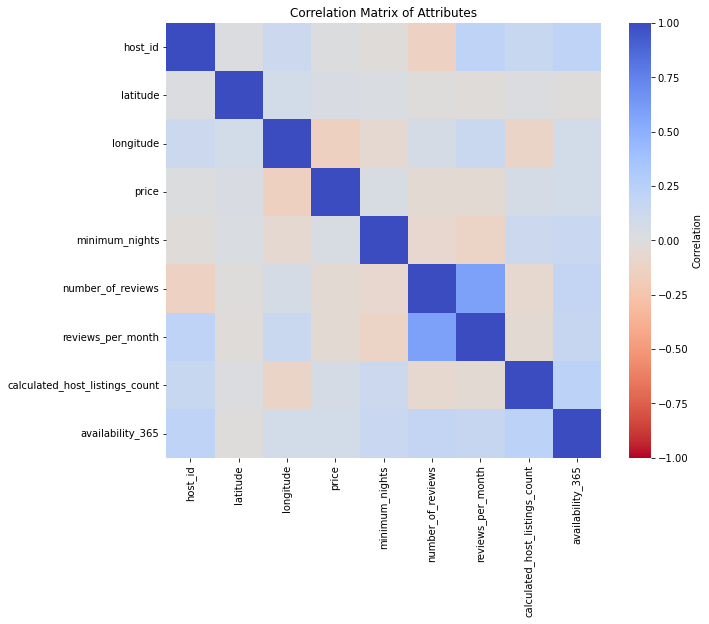

In [11]:
corr_matrix = dataset.corr()

# Visualising all correlations

plt.figure(figsize=(10, 8))
ax4 = sns.heatmap(corr_matrix,
                  vmin=-1,
                  vmax=1,
                  center=0,
                  cmap='coolwarm_r',
                  square=True,
                  cbar_kws={'label': 'Correlation'})

ax4.set_title('Correlation Matrix of Attributes')

In [12]:
# Finding correlation between the price and independent variables
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
number_of_reviews                -0.047954
reviews_per_month                -0.050564
longitude                        -0.150019
Name: price, dtype: float64

### **8.Visualising the data**

<Figure size 864x720 with 0 Axes>

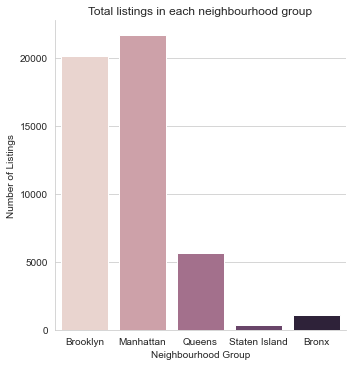

In [13]:
# Bar count of listings in each neighbourhood group

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
ax2 = sns.catplot(x='neighbourhood_group',
                  kind='count',
                  data=dataset,
                  palette="ch:.025")
ax2.set(xlabel='Neighbourhood Group',
        ylabel='Number of Listings',
        title='Total listings in each neighbourhood group')

In [14]:
dataset['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<Figure size 864x720 with 0 Axes>

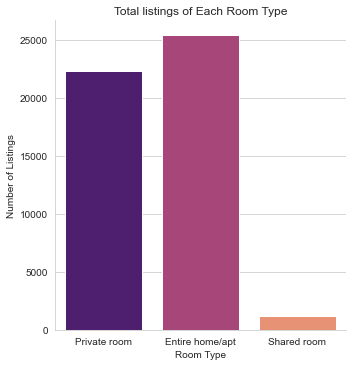

In [15]:
# Bar count of listings of room types

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
ax3 = sns.catplot(x='room_type', kind='count', data=dataset, palette='magma')
ax3.set(xlabel='Room Type',
        ylabel='Number of Listings',
        title='Total listings of Each Room Type')

In [16]:
dataset['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Room Types for Each Neighbourhood Group')

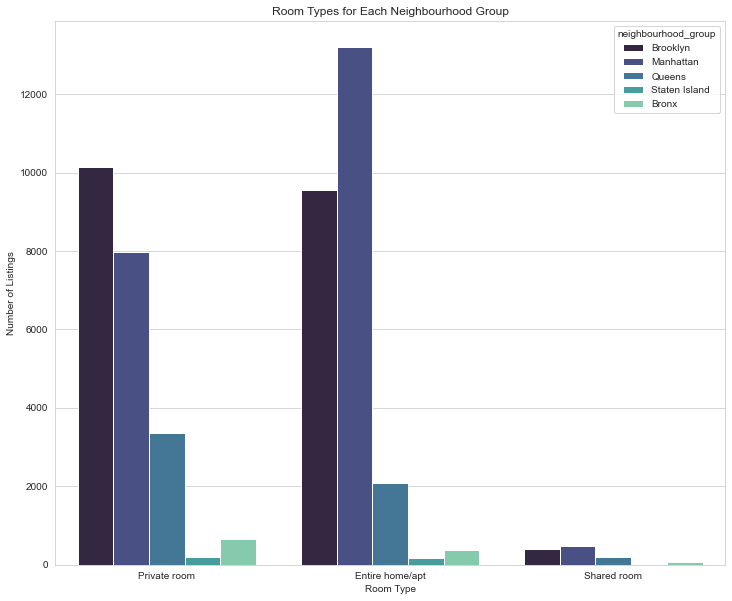

In [17]:
# Bar count of listings of room types in each neighbourhood group

plt.figure(figsize=(12, 10))
ax4 = sns.countplot(dataset['room_type'],
                    hue=dataset['neighbourhood_group'],
                    palette='mako')
ax4.set_xlabel('Room Type')
ax4.set_ylabel('Number of Listings')
ax4.set_title('Room Types for Each Neighbourhood Group')

(0.0, 500.0)

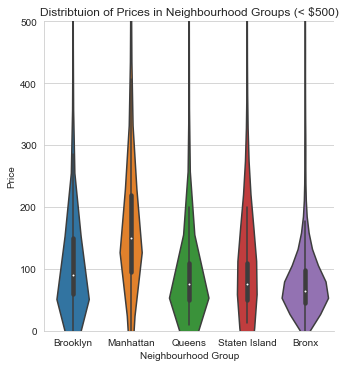

In [18]:
# Distribution of prices in neighbourhood groups

ax5 = sns.catplot(x="neighbourhood_group",
                  y="price",
                  kind="violin",
                  data=dataset)
ax5.set(xlabel='Neighbourhood Group',
        ylabel='Price',
        title='Distribtuion of Prices in Neighbourhood Groups (< $500)')
plt.ylim(0, 500)

### **9.Data preprocessing**

In [19]:
dataset.drop(['host_id'], axis=1, inplace=True)
dataset.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [20]:
# Splitting the data into independent and dependent variables

X = dataset.iloc[:, dataset.columns != 'price'].values
y = dataset.iloc[:, 5].values
y = y.reshape(-1, 1)

### **10.Encoding categorical data**

In [21]:
# Label encoding categorical variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

label_encode = LabelEncoder()

X[:, 0] = label_encode.fit_transform(X[:, 0])
X[:, 1] = label_encode.fit_transform(X[:, 1])
X[:, 4] = label_encode.fit_transform(X[:, 4])

X_labelenc = pd.DataFrame(X)

In [22]:
X_labelenc.head()

,0,1,2,3,4,5,6,7,8,9
0,1,108,40.64749,-73.97237,1,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,1,45,0.38,2,355
2,2,94,40.80902,-73.9419,1,3,0,0.0,1,365
3,1,41,40.68514,-73.95976,0,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,10,9,0.1,1,0


In [23]:
# One hot encoding labeled variables

ct = ColumnTransformer(
    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    [('one_hot_encoder', OneHotEncoder(), [0, 1, 4])],
    # Leave the rest of the columns untouched
    remainder='passthrough')
dataset_encoded = ct.fit_transform(X_labelenc).toarray()

In [24]:
dataset_encoded.shape

(48895, 236)

In [25]:
# Converting array back into a dataframe

df = pd.DataFrame(dataset_encoded)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,40.64749,-73.97237,1.0,9.0,0.21,6.0,365.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,40.75362,-73.98377,1.0,45.0,0.38,2.0,355.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,40.80902,-73.94190,3.0,0.0,0.00,1.0,365.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,40.68514,-73.95976,1.0,270.0,4.64,1.0,194.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,40.79851,-73.94399,10.0,9.0,0.10,1.0,0.0


### **11.Splitting into Test and Training Set**

In [26]:
df.size

11539220

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

### **12.Feature Scaling**

In [28]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **13.Random Forest Regression**

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train.ravel())
y_pred3 = forest_reg.predict(X_test)
r2_score(y_test, y_pred3)

print("""
        Mean Squared Error: {}
        R-squared Score: {}
        Mean Absolute Error: {}
     """.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred3)),
                r2_score(y_test, y_pred3) * 100,
                mean_absolute_error(y_test, y_pred3)))


        Mean Squared Error: 232.88434075344455
        R-squared Score: 1.4591990945505784
        Mean Absolute Error: 66.74632886798241
     


In [32]:
scores = cross_val_score(forest_reg,
                         X_train,
                         y_train.ravel(),
                         scoring="neg_mean_squared_error",
                         cv=10)
Rforest_rmse_scores = np.sqrt(-scores)

In [33]:
print("""
        Scores: {}
        Mean: {}
        Standard deviation: {}
        """.format(Rforest_rmse_scores, Rforest_rmse_scores.mean(),
                   Rforest_rmse_scores.std()))


        Scores: [197.81028805 256.44226954 247.34787067 165.29906953 200.54150784
 194.26039286 199.93547897 259.52200675 242.64497812 252.83111161]
        Mean: 221.6634973947851
        Standard deviation: 31.826497061739534
        


### **14.Grid Search**

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_estimators': [3, 10, 30, 50],
    'max_features': [2, 4, 6, 8]
}, {
    'bootstrap': [False],
    'n_estimators': [3, 10],
    'max_features': [2, 3, 4]
}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [35]:
print("""
        Best parameters: {}
        """.format(grid_search.best_params_, ))


        Best parameters: {'max_features': 2, 'n_estimators': 50}
        


In [36]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

254.4018618903149 {'max_features': 2, 'n_estimators': 3}
225.91667923380766 {'max_features': 2, 'n_estimators': 10}
221.78713274456882 {'max_features': 2, 'n_estimators': 30}
219.4113666898334 {'max_features': 2, 'n_estimators': 50}
255.4853846186612 {'max_features': 4, 'n_estimators': 3}
228.11792375903767 {'max_features': 4, 'n_estimators': 10}
220.85236009362785 {'max_features': 4, 'n_estimators': 30}
219.87610113082013 {'max_features': 4, 'n_estimators': 50}
253.76417215789772 {'max_features': 6, 'n_estimators': 3}
228.65074176624137 {'max_features': 6, 'n_estimators': 10}
221.97556467593932 {'max_features': 6, 'n_estimators': 30}
219.9334682732296 {'max_features': 6, 'n_estimators': 50}
251.09206283217316 {'max_features': 8, 'n_estimators': 3}
228.69588791115893 {'max_features': 8, 'n_estimators': 10}
222.5083014002106 {'max_features': 8, 'n_estimators': 30}
220.07303101059165 {'max_features': 8, 'n_estimators': 50}
250.39631683489463 {'bootstrap': False, 'max_features': 2, 'n_est

# ----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----X----